In [121]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
warnings.filterwarnings('ignore')

In [122]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

engine2.dispose()


In [123]:
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# 1.Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

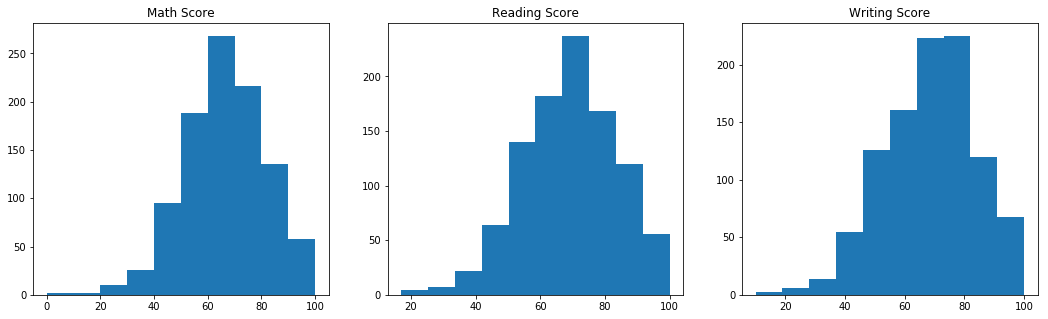

In [124]:
plt.figure(figsize=(18,5) ) 

plt.subplot(1,3,1)
plt.hist('math score', data=student_df)
plt.title('Math Score')

plt.subplot(1,3,2)
plt.hist('reading score', data=student_df)
plt.title ('Reading Score')

plt.subplot(1,3,3)
plt.hist('writing score', data=student_df)
plt.title('Writing Score')

plt.show()

In [197]:
#slight skew to the left is seen. Let's try boxcox

In [198]:
from scipy.stats import boxcox

In [199]:
math_score_boxcox,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
reading_score_boxcox,_ = boxcox(student_df["reading score"])
writing_score_boxcox,_ = boxcox(student_df["writing score"])


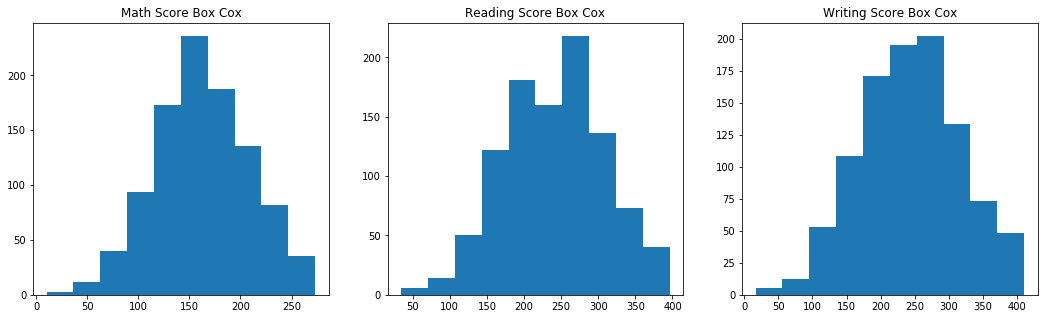

In [200]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.hist(math_score_boxcox)
plt.title('Math Score Box Cox')

plt.subplot(1,3,2)
plt.hist(reading_score_boxcox)
plt.title('Reading Score Box Cox')

plt.subplot(1,3,3)
plt.hist(writing_score_boxcox)
plt.title('Writing Score Box Cox')

plt.show()

In [129]:
#boxcox is supposed to 'normalize' the scores. Let's take a look if it truly was normalize after boxcox

In [209]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_bc_math= jarque_bera(math_score_boxcox)
jb_bc_read=jarque_bera(reading_score_boxcox)
jb_bc_write=jarque_bera(writing_score_boxcox)

n_bc_math=normaltest(math_score_boxcox)
n_bc_read=normaltest(reading_score_boxcox)
n_bc_writing=normaltest(writing_score_boxcox)

print ('Jarque-Bera for math is {}'.format(jb_bc_math))
print ('Jarque-Bera for reading is {}'.format(jb_bc_read))
print ('Jarque-Bera for writing is {}'.format(jb_bc_write))

print()

print ('Normal test for math is {}'.format(n_bc_math))
print ('Normal test for reading is {}'.format(n_bc_read))
print ('Normal test for writing is {}'.format(n_bc_writing))

Jarque-Bera for math is (1.720098104874378, 0.4231413256953709)
Jarque-Bera for reading is (4.119778575331906, 0.1274680814024559)
Jarque-Bera for writing is (4.746478090040098, 0.09317842784055597)

Normal test for math is NormaltestResult(statistic=1.8323073377495822, pvalue=0.40005482895717037)
Normal test for reading is NormaltestResult(statistic=5.282274611852865, pvalue=0.07128015609575467)
Normal test for writing is NormaltestResult(statistic=6.267311355043339, pvalue=0.04355827085023795)


# 2.Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [ ]:
#np.average(student_df["reading score"], weights=student_df["math score"]) (though this was how we calculate 
#weighted means)

In [ ]:
exam_score = (student_df["math score"] +
              student_df["reading score"] + student_df["writing score"])/3

In [211]:
exam_score.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
dtype: float64

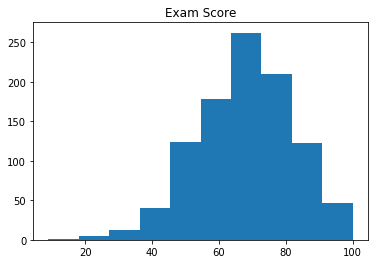

In [212]:
plt.hist(exam_score)
plt.title('Exam Score')
plt.show()

In [213]:
boxed_score,_= boxcox(exam_score)

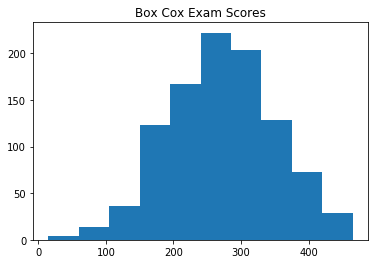

In [145]:
plt.hist(boxed_score)
plt.title('Box Cox Exam Scores')
plt.show() 

In [135]:
#it doesn't look normally distributed. Let's check with Jarque-Bera and Normality test

In [214]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_bc_exam_scores= jarque_bera(boxed_score)
n_bc_exam_scores=normaltest(boxed_score)

In [215]:
jb_bc_exam_scores #it's not normal

(2.4353987431906026, 0.29591016374203183)

In [138]:
n_bc_exam_scores #it's not normal

NormaltestResult(statistic=2.779857245981238, pvalue=0.2490930835165177)

# 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?


In [216]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,296.595164
1,female,group C,some college,standard,completed,69,90,88,353.784491
2,female,group B,master's degree,standard,none,90,95,93,418.027429
3,male,group A,associate's degree,free/reduced,none,47,57,44,171.584396
4,male,group C,some college,standard,none,76,78,75,317.943317


In [217]:
student_df['target']=boxed_score
#sns.countplot(student_df.groupby("gender")
#        ["target"].mean().index, education_df.groupby("race/ethnicity")["exam_score"].mean())

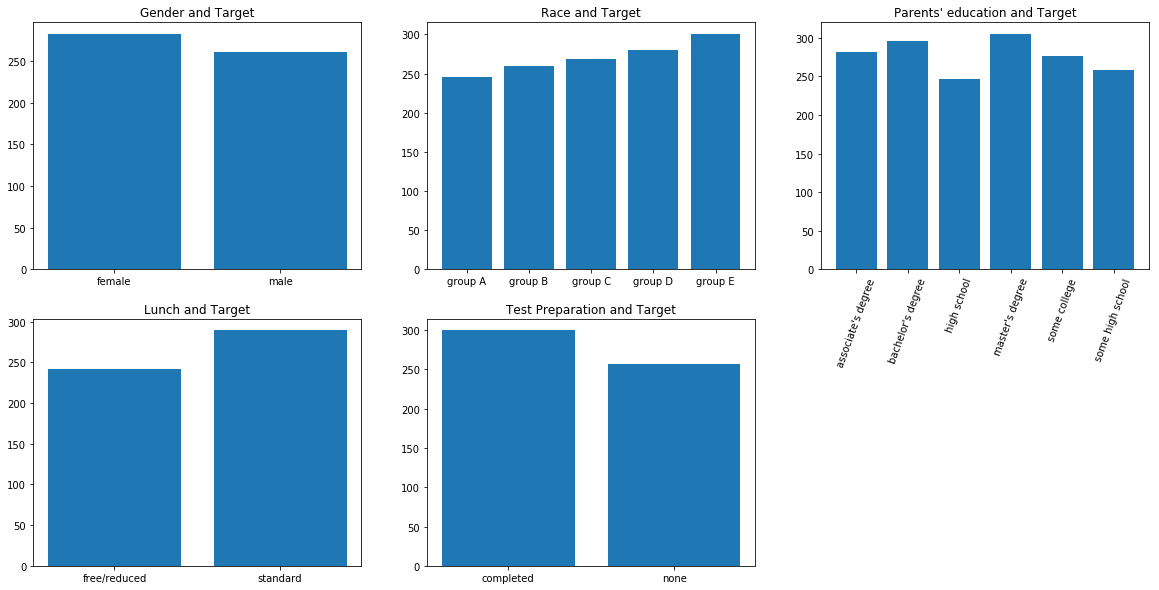

In [196]:
plt.figure(figsize=(20,10))

plt.subplot (2,3,1)
plt.bar(student_df.groupby('gender')['target'].mean().index, student_df.groupby('gender')['target'].mean())
plt.title('Gender and Target')

plt.subplot(2,3,2)
plt.bar(student_df.groupby('race/ethnicity')['target'].mean().index, student_df.groupby('race/ethnicity')['target'].mean())
plt.title('Race and Target')

plt.subplot(2,3,3)

plt.bar(student_df.groupby('parental level of education')['target'].mean().index, 
        student_df.groupby('parental level of education')['target'].mean())
plt.xticks(rotation=70)
plt.title('Parents\' education and Target')

plt.subplot(2,3,4)
plt.bar(student_df.groupby('lunch')['target'].mean().index, student_df.groupby('lunch')['target'].mean())
plt.title('Lunch and Target')

plt.subplot(2,3,5)
plt.bar(student_df.groupby('test preparation course')['target'].mean().index, student_df.groupby('test preparation course')['target'].mean())
plt.title('Test Preparation and Target')

plt.show()
#(education_df.groupby("race/ethnicity")
 #       ["exam_score"].mean().index, education_df.groupby("race/ethnicity")["exam_score"].mean())

In [ ]:
#We took the means of the targets based on each variable. Based on these barplots, females in group E that's had 
#master's degree, economically secured and have a completed test preparations are determinants of success. 